<a href="https://colab.research.google.com/github/Attent1/CP2-IA/blob/main/CP2_IA_Finalizado%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ***DIVISÃO DE GRUPOS ***





In [ ]:
url = "/content/solicitacoescredito.csv"

In [ ]:
# Carregar o arquivo CSV
dados = pd.read_csv(url)
colunas_para_media = ['totalAtivo', 'duplicatasAReceber', 'ativoCirculante', 'capitalSocial']

dados = dados.groupby('cnpjSemTraco')[colunas_para_media].mean().reset_index()

# Remover todas as colunas não numéricas
df_numericos = dados.select_dtypes(include='number')
df_numericos = df_numericos.drop('totalAtivo', axis=1)

df= df_numericos.fillna(df_numericos.mean())


In [ ]:
df.shape

(2829, 3)

In [ ]:
import numpy as np

# Adicionando condições para classificar o porte de cada empresa
condicoes = [
    (df_numericos['ativoCirculante'] <= 3344735.75),
    (df_numericos['ativoCirculante'] <= 44501092),
    (df_numericos['ativoCirculante'] <= 445102800.0)
]

opcoes = ['pequena', 'media', 'grande']

# Usando np.select() para atribuir valores com base nas condições
df_numericos['porte'] = np.select(condicoes, opcoes, default='desconhecido')


In [ ]:
df_numericos.head()

,duplicatasAReceber,ativoCirculante,capitalSocial,porte
0,2.080258e+06,8.654597e+06,250000.000000,media
1,NaN,NaN,60000.000000,desconhecido
2,5.274525e+04,1.330509e+06,120000.000000,pequena
3,5.296124e+06,8.608550e+06,533333.333333,media
4,7.708900e+04,8.288470e+05,30000.000000,pequena


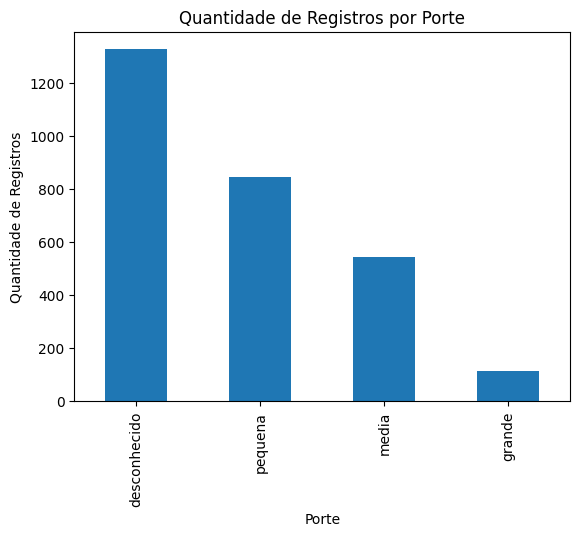

In [ ]:
contagem_portes = df_numericos['porte'].value_counts()

# Plotando o gráfico de barras
contagem_portes.plot(kind='bar')

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Registros por Porte')
plt.xlabel('Porte')
plt.ylabel('Quantidade de Registros')

# Exibindo o gráfico
plt.show()

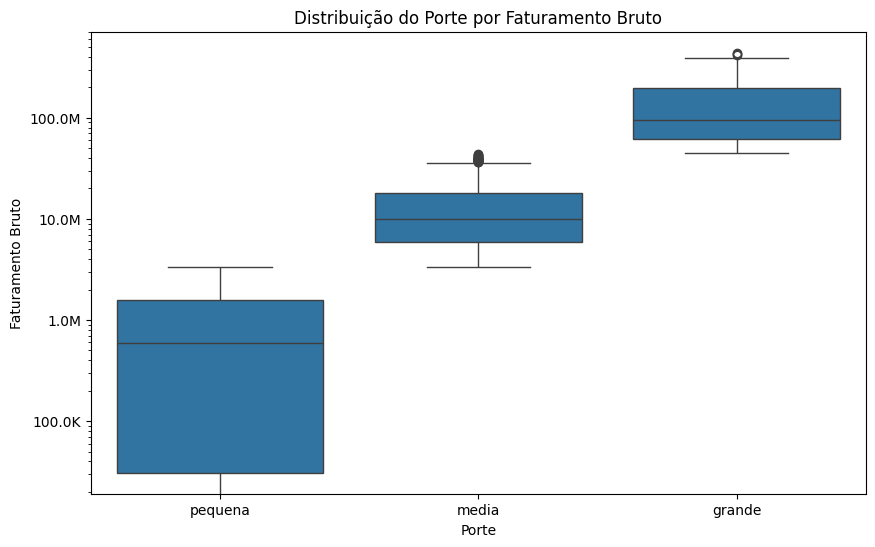

In [ ]:
import matplotlib.ticker as ticker

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='porte', y='ativoCirculante', data=df_numericos, order=['pequena', 'media', 'grande'])

# Adicionando título e rótulos aos eixos
plt.title('Distribuição do Porte por Faturamento Bruto')
plt.xlabel('Porte')
plt.ylabel('Faturamento Bruto')

# Ajustando a escala do eixo y para melhor visualização
plt.yscale('log')  # Usar escala logarítmica se houver grande disparidade nos valores

# Customizando os rótulos do eixo y para mostrar valores em uma unidade mais legível
def y_fmt(x, _):
    if x >= 1e9:
        return f'{x * 1e-9:.1f}B'
    elif x >= 1e6:
        return f'{x * 1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x * 1e-3:.1f}K'
    else:
        return f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

# Exibindo o gráfico
plt.show()

# *TREINAMENTO DE CLASSIFICAÇÃO PARA SABER ONDE UMA NOVA EMPRESA SE ENCAIXARIA*


In [ ]:
# Remover linhas com valores ausentes
df = df_numericos.dropna()

# Dividir os df em features (X) e target (y)
X = df.drop(columns=["porte"])
y = df['porte']

# Dividir os df em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Árvore de Decisão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acuracia)


Acurácia do modelo: 1.0


In [ ]:
df_numericos.head()

,duplicatasAReceber,ativoCirculante,capitalSocial,porte
0,2.080258e+06,8.654597e+06,250000.000000,media
1,NaN,NaN,60000.000000,desconhecido
2,5.274525e+04,1.330509e+06,120000.000000,pequena
3,5.296124e+06,8.608550e+06,533333.333333,media
4,7.708900e+04,8.288470e+05,30000.000000,pequena


In [ ]:
df_numericos.describe()

,duplicatasAReceber,ativoCirculante,capitalSocial
count,1.523000e+03,1.523000e+03,2.789000e+03
mean,2.351452e+07,5.184606e+07,1.028221e+07
std,5.189311e+08,7.843650e+08,1.134047e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.170850e+04,4.577709e+05,4.685000e+04
50%,6.335810e+05,2.532828e+06,1.000000e+05
75%,3.877278e+06,1.099737e+07,3.000000e+05
max,2.009358e+10,2.903832e+10,4.100000e+09


In [ ]:
input_manual = {
    'duplicatasAReceber': [9212120],
    'ativoCirculante': [33447350],
    'capitalSocial' : [1000000]
}

input_df = pd.DataFrame(input_manual)

input_preprocessado = input_df.fillna(input_df.mean())

previsoes = modelo.predict(input_preprocessado)

print("Previsão para o input manual:", previsoes)


Previsão para o input manual: ['media']


# ***TREINAMENTO DE REGRESSÃO PARA SABER QUANTO LIBERAR PARA A EMPRESA ***



In [ ]:
url = "/content/drive/MyDrive/solicitacoescredito.csv"

In [ ]:
# Carregar o arquivo CSV
dados = pd.read_csv(url)
colunas_para_media = ['ativoCirculante', 'totalAtivo', 'duplicatasAReceber', 'capitalSocial']

dados = dados.groupby('cnpjSemTraco')[colunas_para_media].mean().reset_index()

# Remover todas as colunas não numéricas
df_numericos = dados.select_dtypes(include='number')
df_numericos = df_numericos.drop('capitalSocial', axis=1)
df_numericos = df_numericos.fillna(df_numericos.mean())

# Remover qualquer linha restante com valores ausentes
dados = df_numericos.dropna()

# Definir as features (X) e o target (y)
X = dados[['totalAtivo', 'duplicatasAReceber']]  # Note que as features devem ser passadas como uma lista
y = dados['ativoCirculante']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Avaliação do modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erro médio quadrático do modelo:", mse)


Erro médio quadrático do modelo: 448771010486357.4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Carregar o arquivo CSV
dados = pd.read_csv(url)
colunas_para_media = ['ativoCirculante', 'totalAtivo', 'duplicatasAReceber', 'capitalSocial']

dados = dados.groupby('cnpjSemTraco')[colunas_para_media].mean().reset_index()

# Remover todas as colunas não numéricas
dados_numericos = dados.select_dtypes(include='number')
dados_numericos = dados_numericos.drop('capitalSocial', axis=1)
dados_numericos = dados_numericos.fillna(dados_numericos.mean())

# Remover qualquer linha restante com valores ausentes
dados = dados_numericos.dropna()

# Definir as features (X) e o target (y)
X = dados[['totalAtivo', 'duplicatasAReceber']]  # Note que as features devem ser passadas como uma lista
y = dados['ativoCirculante']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciação e treinamento do modelo
modelo_arvore = DecisionTreeRegressor(random_state=42)
modelo_arvore.fit(X_train, y_train)

# Avaliação do modelo
y_pred = modelo_arvore.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erro médio quadrático do modelo de Árvore de Decisão:", mse)


Erro médio quadrático do modelo de Árvore de Decisão: 2779071286852566.5


In [ ]:
# Novos dados para previsão
novos_dados = pd.DataFrame({
    'totalAtivo': [445102800],
    'duplicatasAReceber': [9212120]
})

# Previsões
creditos_aprovados = modelo.predict(novos_dados)
print(creditos_aprovados)


[1.50080795e+08]


                    ativoCirculante  totalAtivo  duplicatasAReceber
ativoCirculante            1.000000    0.986101            0.979430
totalAtivo                 0.986101    1.000000            0.963158
duplicatasAReceber         0.979430    0.963158            1.000000


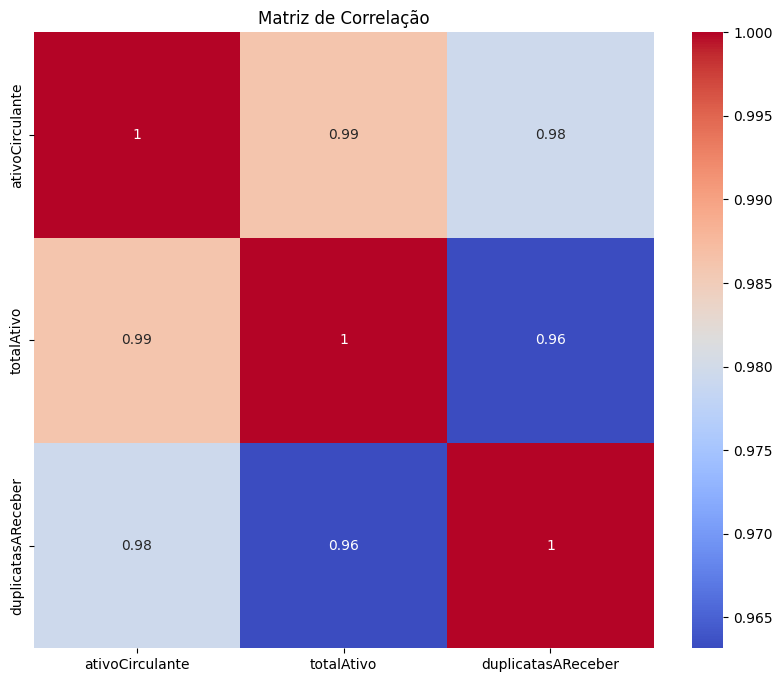

In [ ]:
# Verificar a correlação
correlacao = dados_numericos.corr()
print(correlacao)

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
# Novos dados de exemplo
novos_dados = pd.DataFrame({
    'totalAtivo': [7000000],
    'duplicatasAReceber': [500000]
})

# Previsões
creditos_aprovados = modelo.predict(novos_dados)

print(creditos_aprovados)


[11463524.73389877]
